# Inference in Graphical Models

Improved figures for Chapter 8.

In [1]:
import os, numpy as np, matplotlib.pyplot as plt
os.makedirs('figs', exist_ok=True)
np.random.seed(0)

## Bayesian Network: Evidence Propagation

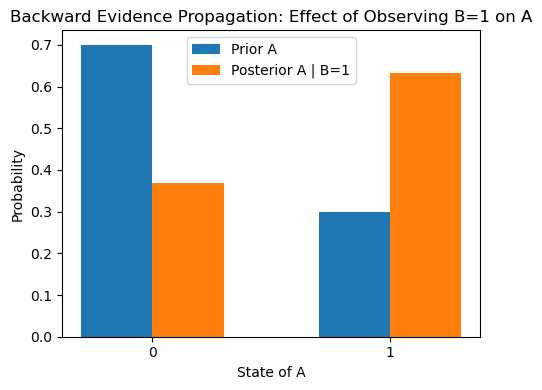

In [5]:

P_A = np.array([0.7,0.3])
P_B_given_A = np.array([[0.8,0.2],[0.2,0.8]])
P_C_given_A = np.array([[0.6,0.4],[0.3,0.7]])

joint = np.zeros((2,2,2))
for a in [0,1]:
    for b in [0,1]:
        for c in [0,1]:
            joint[a,b,c] = P_A[a]*P_B_given_A[a,b]*P_C_given_A[a,c]

P_A_prior = joint.sum(axis=(1,2))
posterior = joint[:,1,:]
posterior /= posterior.sum()
P_A_post = posterior.sum(axis=1)

x = np.arange(2)
plt.figure(figsize=(5,4))
plt.bar(x-0.15, P_A_prior, 0.3, label="Prior A")
plt.bar(x+0.15, P_A_post, 0.3, label="Posterior A | B=1")
plt.xticks(x, ["0","1"])
plt.xlabel("State of A")
plt.ylabel("Probability")
plt.title("Backward Evidence Propagation: Effect of Observing B=1 on A")
plt.legend()
plt.tight_layout()
plt.savefig("figs/bn_backward_propagation.png", dpi=150)
plt.show()


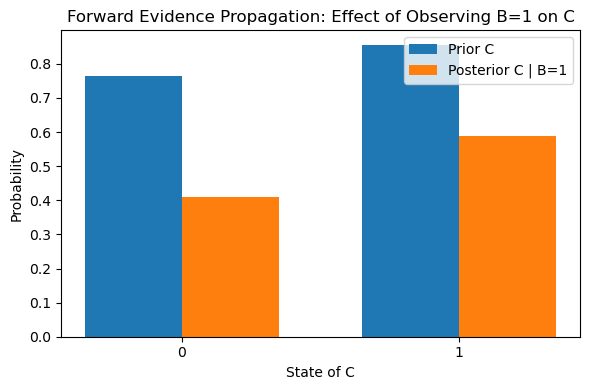

In [4]:
# Forward evidence propagation: effect of B=1 on C

# Prior marginal of C
P_C_prior = joint.sum(axis=(0,1))

# Posterior marginal of C given B=1
P_C_post = posterior.sum(axis=0)

x = np.arange(2)
width = 0.35

plt.figure(figsize=(6,4))
plt.bar(x - width/2, P_C_prior, width, label="Prior C")
plt.bar(x + width/2, P_C_post, width, label="Posterior C | B=1")
plt.xticks(x, ["0","1"])
plt.xlabel("State of C")
plt.ylabel("Probability")
plt.title("Forward Evidence Propagation: Effect of Observing B=1 on C")
plt.legend()
plt.tight_layout()
plt.savefig("figs/bn_forward_propagation.png", dpi=150)
plt.show()


## Hidden Markov Model: Filtering

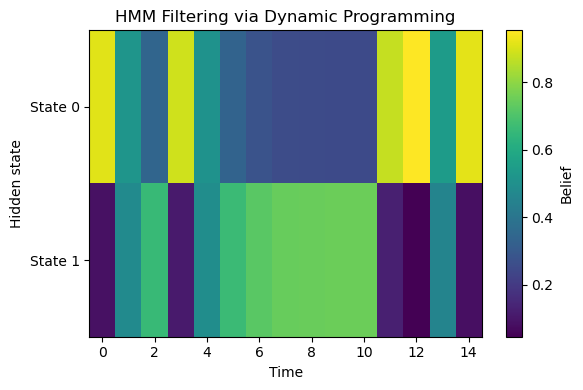

In [3]:

T=15
A=np.array([[0.8,0.2],[0.4,0.6]])
B=np.array([[0.7,0.3],[0.1,0.9]])
obs=np.random.choice([0,1], size=T)

alpha=np.zeros((T,2))
alpha[0]=np.array([0.6,0.4])*B[:,obs[0]]
alpha[0]/=alpha[0].sum()
for t in range(1,T):
    alpha[t]=(alpha[t-1]@A)*B[:,obs[t]]
    alpha[t]/=alpha[t].sum()

plt.figure(figsize=(6,4))
plt.imshow(alpha.T, aspect="auto", cmap="viridis")
plt.colorbar(label="Belief")
plt.yticks([0,1],["State 0","State 1"])
plt.xlabel("Time")
plt.ylabel("Hidden state")
plt.title("HMM Filtering via Dynamic Programming")
plt.tight_layout()
plt.savefig("figs/hmm_filtering_heatmap.png", dpi=150)
plt.show()
